## problem statement:

### EDA With python aplying linear regression:- (Exploratory Data Analysis)

#### -> Some real estate company X has data containing the prices of property and other factors about the property.

#### -> The company wants to identify important factors that are affecting the price of a property.

#### -> Create a linear model that can accurately predict house prices.

In [1]:
## importing required library:-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and understanding data

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
## To check number of raws and colunms:-

df.shape

(545, 13)

In [4]:
## to check first five dataset using head method():-

pd.set_option('max_rows',None) #Showing all columns 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
## To check columnwise summary:-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe() ## To check summary of numeric column

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Data Quality Check:-
        

### 1.checking missing value/treatment:-

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Observation:-

#####   - there are no missing values in all colunms of dataframe.

### 2.checking outliers/treatment:-

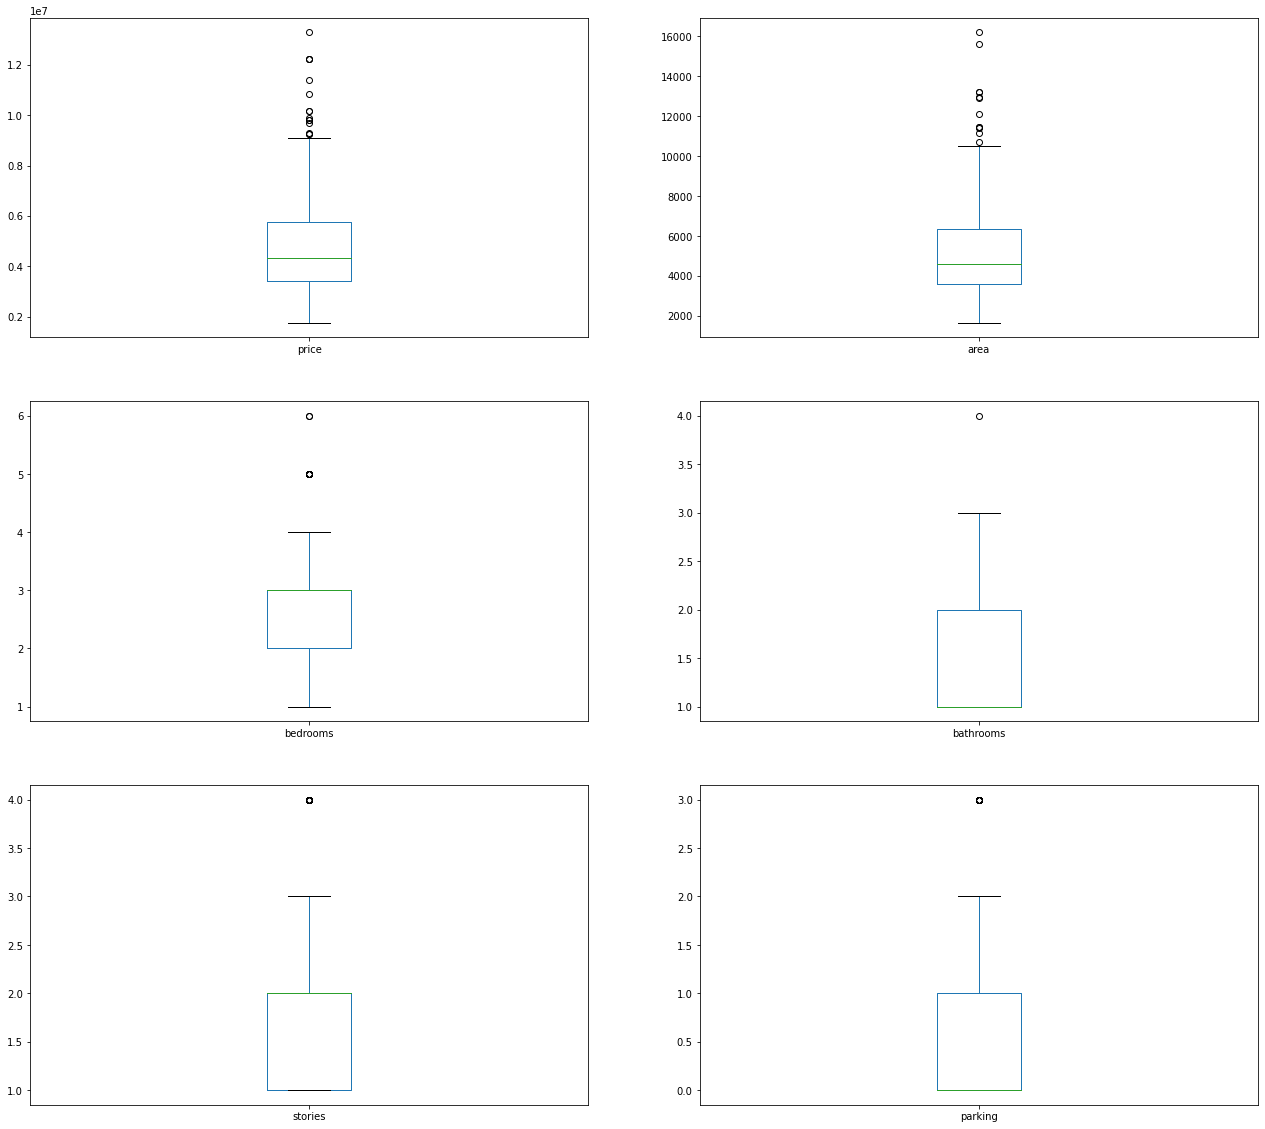

In [8]:
## checking outliers using boxplot:-

df.plot(kind='box', subplots=True, figsize=(22,20), layout=(3,2))
plt.show()

### Next, we do capping to 95 percentile on numeric column of housing dataframe:

In [9]:
num_col = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']

def num(x):
    plt.figure(figsize=(6,6))
    plt.title(x)
    sns.boxplot(df[x])
    plt.show()
    return

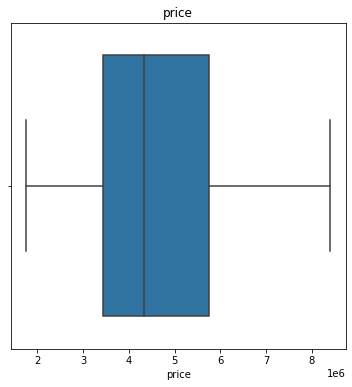

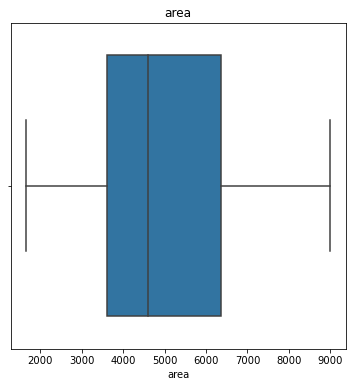

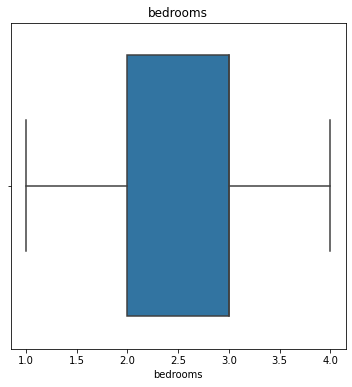

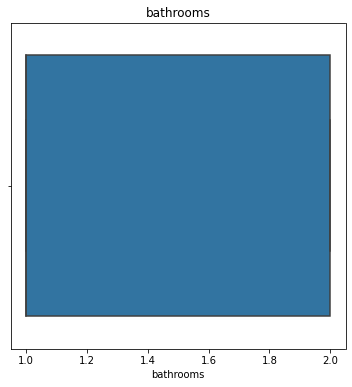

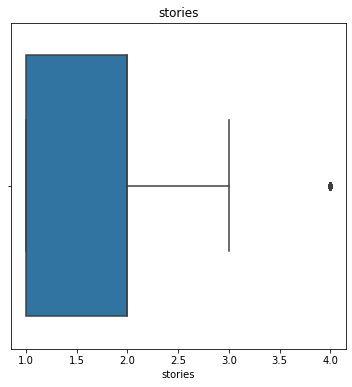

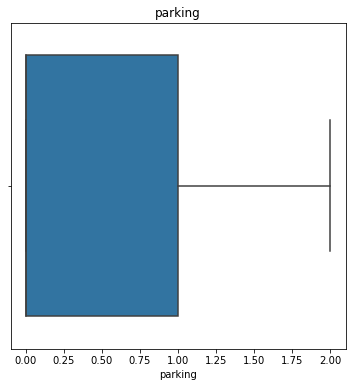

In [10]:
for x in num_col:
    q3,q1 = np.percentile(df[x],[75,25])
    q4= np.percentile(df[x],[95])
    df.loc[df[x] > q4[0], x] = q4[0]
    num(x)

## Step 3: Data Analysis

<AxesSubplot:xlabel='area', ylabel='price'>

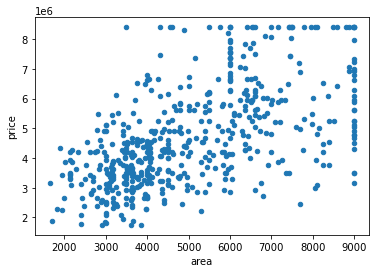

In [11]:
## comparing area and price column:-

df.plot.scatter('area','price') #two comapre any two column of df

#### obervation:-

         -we can see the values of price is dependent on area.
         -linear relationship between two columns as area increases price increases.
        
    

<AxesSubplot:xlabel='area', ylabel='stories'>

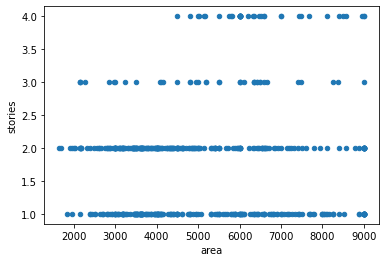

In [12]:
## comparing area and stories column:-

df.plot.scatter('area','stories')

#### observation:-

            -the construction area tend to decrease with an increase in the stories.

<AxesSubplot:xlabel='area', ylabel='bedrooms'>

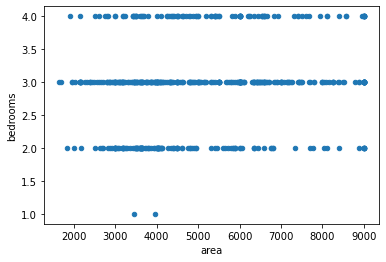

In [13]:
## comparing area and bedrooms column:-

df.plot.scatter('area','bedrooms')

#### observation:-

        - as we can see majority of the house have 3 bedrooms in area.

### 2: Multivariance analysis:- Heatmap

<AxesSubplot:>

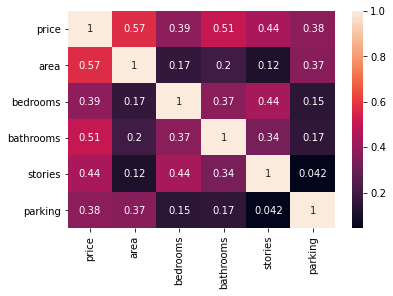

In [14]:
sns.heatmap(df.corr(), annot=True)
#annot = True to print the value insied the square

### Obsevation

            -the correlation coefficient ranges from -1 to 1. if the value is close to 1, it means that there is strong 
            positive corrrelation betwqeen two variables. when it is close to -1, the variable have a strong negative
            corrrelation
            
            -we select those features which have a high correlation with out target variable price.
            by looking at the correlation matrix we can see that area has strong positive correlation with [0.57]
            where as bathrooms has a high negative correlation with [0.2]

### Creating dummy values on furnishingstatus:-

In [15]:
x= df['furnishingstatus']

x= pd.get_dummies(x,drop_first=True)

In [16]:
x

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [17]:
df.drop('furnishingstatus', axis=1,inplace=True) #the data is modified inplace  and updated

In [18]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,8400000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes
1,8400000.0,8960.0,4.0,2.0,4.0,yes,no,no,no,yes,2.0,no
2,8400000.0,9000.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes
3,8400000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,2.0,yes
4,8400000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no
5,8400000.0,7500.0,3.0,2.0,1.0,yes,no,yes,no,yes,2.0,yes
6,8400000.0,8580.0,4.0,2.0,4.0,yes,no,no,no,yes,2.0,yes
7,8400000.0,9000.0,4.0,2.0,2.0,yes,no,no,no,no,0.0,no
8,8400000.0,8100.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,yes
9,8400000.0,5750.0,3.0,2.0,4.0,yes,yes,no,no,yes,1.0,yes


In [19]:
df = pd.concat([df,x],axis=1) #to conacte two dataframe

In [20]:
df.drop('semi-furnished', axis=1, inplace =True)

In [21]:
df.drop('unfurnished', axis=1, inplace = True)

In [22]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,8400000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes
1,8400000.0,8960.0,4.0,2.0,4.0,yes,no,no,no,yes,2.0,no
2,8400000.0,9000.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes
3,8400000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,2.0,yes
4,8400000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no
5,8400000.0,7500.0,3.0,2.0,1.0,yes,no,yes,no,yes,2.0,yes
6,8400000.0,8580.0,4.0,2.0,4.0,yes,no,no,no,yes,2.0,yes
7,8400000.0,9000.0,4.0,2.0,2.0,yes,no,no,no,no,0.0,no
8,8400000.0,8100.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,yes
9,8400000.0,5750.0,3.0,2.0,4.0,yes,yes,no,no,yes,1.0,yes


In [23]:
df = pd.concat([df,x],axis=1)

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,8400000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,0,0
1,8400000.0,8960.0,4.0,2.0,4.0,yes,no,no,no,yes,2.0,no,0,0
2,8400000.0,9000.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,1,0
3,8400000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,2.0,yes,0,0
4,8400000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,0,0


#### Obsevatation:-

        -we created dummy values on furninshing status and droped the column 
        
        - ater that we concate the two dataframe of df, and x which contains dummies

## Step 4: Preparing data

### 1. Encoder

In [25]:
#Pre processing step

from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

In [26]:
c_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

df[c_col] = df[c_col].apply(le.fit_transform)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,8400000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0,0
1,8400000.0,8960.0,4.0,2.0,4.0,1,0,0,0,1,2.0,0,0,0
2,8400000.0,9000.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1,0
3,8400000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.0,1,0,0
4,8400000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0,0


### select the target & Transform the model using Train_test_split:-

In [33]:
x = df.drop(['price'], axis=1)

In [34]:
y = df['price']

### Train_test_split

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [36]:
x_train.shape

(381, 13)

In [37]:
y_train.shape

(381,)

## Scalling:-

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [39]:
scaler.fit(x_train) #fit the scaler to the train set, it will leran the parameters

MinMaxScaler()

In [40]:
#transforming train and test set

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [42]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,7160.0,3.0,1.0,1.0,1,0,1,0,0,2.0,1,0,1
363,3584.0,2.0,1.0,1.0,1,0,0,1,0,0.0,0,1,0
370,4280.0,2.0,1.0,1.0,1,0,0,0,1,2.0,0,1,0
31,7000.0,3.0,1.0,4.0,1,0,0,0,1,2.0,0,1,0
113,9000.0,3.0,1.0,1.0,1,0,1,0,0,2.0,1,0,0


In [43]:
np.round(x_train_scaled.describe(),2) #to check the values

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00
mean,0.46,0.64,0.25,0.26,0.86,0.19,0.36,0.05,0.32,0.33,0.24,0.43,0.31
std,0.25,0.23,0.43,0.29,0.34,0.39,0.48,0.22,0.47,0.40,0.43,0.50,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.39,0.67,0.00,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.64,0.67,0.00,0.33,1.00,0.00,1.00,0.00,1.00,0.50,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [44]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [45]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0,0
1,8960.0,4.0,2.0,4.0,1,0,0,0,1,2.0,0,0,0
2,9000.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1,0
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.0,1,0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0,0


In [46]:
y.head()

0    8400000.0
1    8400000.0
2    8400000.0
3    8400000.0
4    8400000.0
Name: price, dtype: float64

In [47]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(log, 7)

In [49]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [50]:
x.shape

(545, 13)

In [51]:
y.shape

(545,)

In [52]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False,  True])

In [53]:
rfe.ranking_

array([7, 1, 2, 1, 5, 4, 1, 6, 1, 1, 1, 3, 1])

In [54]:
#i have to use zip:-
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [55]:
col = x_train.columns[rfe.support_]
col

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [56]:
x_train_rfe = x_train[col]

#creating new xtrain_rfe and selecting their variables:-

NameError: name 'col' is not defined

In [ ]:
x_train_rfe.head()

In [ ]:
x_train_rfe.shape

In [ ]:
x_test_rfe = x_test[col]

In [ ]:
x_test_rfe.shape

In [ ]:
y_test.shape

## Step 5: Fit the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train_rfe,y_train)
print(lr_model.coef_)

## Step 6: Predict the model:-

In [ ]:
y_pred = lr_model.predict(x_test)
print(y_pred.shape)

In [ ]:
plt.scatter(y_test,y_pred)

## Step 6: Evaluate the model

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)